# EE2211 Tutorial 10




## @author: KAToh


## Question 2 Python Codes

scikit-learn version: 1.1.2
order is  1
fold is  0
fold is  1
fold is  2
fold is  3
fold is  4
order is  2
fold is  0
fold is  1
fold is  2
fold is  3
fold is  4
order is  3
fold is  0
fold is  1
fold is  2
fold is  3
fold is  4
order is  4
fold is  0
fold is  1
fold is  2
fold is  3
fold is  4
order is  5
fold is  0
fold is  1
fold is  2
fold is  3
fold is  4
order is  6
fold is  0
fold is  1
fold is  2
fold is  3
fold is  4
order is  7
fold is  0
fold is  1
fold is  2
fold is  3
fold is  4
order is  8
fold is  0
fold is  1
fold is  2
fold is  3
fold is  4
order is  9
fold is  0
fold is  1
fold is  2
fold is  3
fold is  4
order is  10
fold is  0
fold is  1
fold is  2
fold is  3
fold is  4


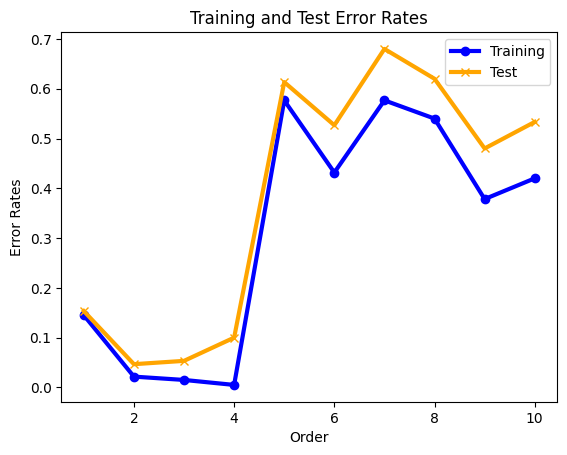

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 18 17:08:04 2020
@author: KAToh
"""

import numpy as np
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
from sklearn.datasets import load_iris
iris_dataset = load_iris()
X = np.array(iris_dataset['data'])
y = np.array(iris_dataset['target'])
## one-hot encoding
Y = list()
for i in y:
	letter = [0, 0, 0]
	letter[i] = 1
	Y.append(letter)
Y = np.array(Y)    

from sklearn.preprocessing import PolynomialFeatures
error_rate_train_array = []
error_rate_test_array = []

##--- Loop for Polynomial orders 1 to 10 ---##

for order in range(1,11): 
    print ("order is ", order)
    error_rate_train_array_fold = []
    error_rate_test_array_fold = []
    # Random permutation of data
    #Idx = np.arange(0,150)
    Idx = np.random.RandomState().permutation(len(y))
    # Loop 5 times for 5-fold

    for k in range(0,5):
        print("fold is ",k)
        #print (Idx)
        ##--- Prepare training and test data for the 5-fold ---#
        # Prepare indexing for each fold
        N = np.around((k+1)*len(y)/5)
        N = N.astype(int)
        #print(N)
        X_test = X[Idx[N-30:N]]
        
        #print(Idx[N-30:N])
        #print (X_test)
        Y_test = Y[Idx[N-30:N]]
        
        Idxtrn = np.setdiff1d(Idx, Idx[N-30:N])

        X_train = X[Idxtrn]
        Y_train = Y[Idxtrn]

        ##--- Polynomial Classification ---##
        poly = PolynomialFeatures(order)
        P = poly.fit_transform(X_train)
        Pt = poly.fit_transform(X_test)
        
        if P.shape[0] > P.shape[1]: # over-/under-determined cases
            reg_L = 0.00*np.identity(P.shape[1])
            inv_PTP = np.linalg.inv(P.transpose().dot(P))
            pinv_L = inv_PTP.dot(P.transpose())
            wp = pinv_L.dot(Y_train)
        else:
            reg_R = 0.00*np.identity(P.shape[0])
##            if(order == 10 and k == 4) :
##                    print ("here")
##                    inv_PPT = np.linalg.inv(P.dot(P.transpose())+reg_R)
##            else :
##                    inv_PPT = np.linalg.inv(P.dot(P.transpose()))
            inv_PPT = np.linalg.inv(P.dot(P.transpose()))
            pinv_R = P.transpose().dot(inv_PPT)
            wp = pinv_R.dot(Y_train)

        
        ##--- trained output ---##
        y_est_p = P.dot(wp); 
        y_cls_p = [[1 if y == max(x) else 0 for y in x] for x in y_est_p ]    
        m1tr = np.matrix(Y_train)
        m2tr = np.matrix(y_cls_p)
        # training classification error count and rate computation
        difference = np.abs(m1tr - m2tr)
        error_train = np.where(difference.any(axis=1))[0]
        error_rate_train = len(error_train)/len(difference)
        error_rate_train_array_fold += [error_rate_train]
        ##--- test output ---##
        yt_est_p = Pt.dot(wp); 
        yt_cls_p = [[1 if y == max(x) else 0 for y in x] for x in yt_est_p ]    
        m1 = np.matrix(Y_test)
        m2 = np.matrix(yt_cls_p)
        # test classification error count and rate computation
        difference = np.abs(m1 - m2)
        error_test = np.where(difference.any(axis=1))[0]
        error_rate_test = len(error_test)/len(difference)
        error_rate_test_array_fold += [error_rate_test]
    # store results for each polynomial order
    error_rate_train_array += [np.mean(error_rate_train_array_fold)] 
    error_rate_test_array += [np.mean(error_rate_test_array_fold)]
    
##--- plotting ---##
import matplotlib.pyplot as plt
order=[x for x in range(1,11)]
plt.plot(order, error_rate_train_array, color='blue', marker='o', linewidth=3, label='Training')
plt.plot(order, error_rate_test_array, color='orange', marker='x', linewidth=3, label='Test')
plt.xlabel('Order')
plt.ylabel('Error Rates')
plt.title('Training and Test Error Rates')
plt.legend()
plt.show()


